### Depression Classification Modelling

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Read cleaned healthy minds study csv
hms = pd.read_csv("hms.csv")

#### Recode gender category to be binary

In [29]:
hms['gender_birth'] = hms['gender_birth'].apply(lambda x: 1 if x == 2 else 0)

#### Scale likert scale variables

Also flip some ordinal variables so "No/agree" is essentially 0 and "yes/agree" is 1 to be consistent

In [30]:
hms['financial_stress'] = hms['financial_stress'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))
hms['perceived_help_need'] = hms['perceived_help_need'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))
hms['know_where_help'] = hms['know_where_help'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))

In [31]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,stem,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white
0,18.0,0,5,3,5,3,3,1,1,3.5,...,0,0,1,0,0,0,12,13,4,0
1,22.0,1,4,2,5,1,0,0,0,2.5,...,0,0,1,0,0,0,12,10,6,0
2,19.0,1,1,3,4,4,4,0,0,4.0,...,0,0,0,0,0,0,13,12,6,0
3,18.0,1,3,1,1,5,0,0,0,3.0,...,1,0,0,0,0,0,7,7,9,0
4,20.0,0,1,3,4,4,3,1,1,2.5,...,0,0,0,0,0,0,16,8,3,0


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to normalize
ordinal_columns = ['seek_help_if_need', 'perceived_help_need', 'know_where_help', 'financial_stress', 'exercise_hours_weekly']

# Apply MinMaxScaler to these columns
scaler = MinMaxScaler()
hms[ordinal_columns] = scaler.fit_transform(hms[ordinal_columns])


In [33]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,stem,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white
0,18.0,0,1.00,1.000000,1.00,0.50,3,1,1,3.5,...,0,0,1,0,0,0,12,13,4,0
1,22.0,1,0.75,0.666667,1.00,0.00,0,0,0,2.5,...,0,0,1,0,0,0,12,10,6,0
2,19.0,1,0.00,1.000000,0.75,0.75,4,0,0,4.0,...,0,0,0,0,0,0,13,12,6,0
3,18.0,1,0.50,0.333333,0.00,1.00,0,0,0,3.0,...,1,0,0,0,0,0,7,7,9,0
4,20.0,0,0.00,1.000000,0.75,0.75,3,1,1,2.5,...,0,0,0,0,0,0,16,8,3,0


### Using PHQ-9 standardized guidelines to determine high and low risk of depression 
#### A score of 10 is considered needing intervention

Score Range  |  Severity  |  Clinical Interpretation

0–4        |     Minimal	|   Normal / No intervention usually needed

5–9	       |       Mild	  |   Watchful waiting; may not need treatment

10–14	    |     Moderate	 |  Possible clinical depression; monitor/assist

15–19       |    Moderately severe  |	Likely clinical depression; active treatment

20–27      |     Severe	    |   Severe depression; immediate treatment


In [34]:
hms['depression_risk'] = hms['depression_score'].apply(lambda x: 1 if x >= 10 else 0)


In [35]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white,depression_risk
0,18.0,0,1.00,1.000000,1.00,0.50,3,1,1,3.5,...,0,1,0,0,0,12,13,4,0,1
1,22.0,1,0.75,0.666667,1.00,0.00,0,0,0,2.5,...,0,1,0,0,0,12,10,6,0,1
2,19.0,1,0.00,1.000000,0.75,0.75,4,0,0,4.0,...,0,0,0,0,0,13,12,6,0,1
3,18.0,1,0.50,0.333333,0.00,1.00,0,0,0,3.0,...,0,0,0,0,0,7,7,9,0,0
4,20.0,0,0.00,1.000000,0.75,0.75,3,1,1,2.5,...,0,0,0,0,0,16,8,3,0,1


In [36]:
hms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 7838 non-null   float64
 1   gender_birth                7838 non-null   int64  
 2   exercise_hours_weekly       7838 non-null   float64
 3   seek_help_if_need           7838 non-null   float64
 4   perceived_help_need         7838 non-null   float64
 5   know_where_help             7838 non-null   float64
 6   num_of_support_areas        7838 non-null   int64  
 7   diagnosed_mental_illness    7838 non-null   int64  
 8   therapy_past12_months       7838 non-null   int64  
 9   gpa                         7838 non-null   float64
 10  financial_stress            7838 non-null   float64
 11  year_in_school              7838 non-null   int64  
 12  suicide_idea                7838 non-null   int64  
 13  suicide_plan                7838 

In [37]:
hms['depression_risk'].value_counts()

depression_risk
0    4649
1    3189
Name: count, dtype: int64

### Start machine learning process 
#### Keeping in mind the slight imbalance in the target variable

In [38]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Features and target
X = hms.drop(columns=['depression_risk','depression_score','mental_wellness_score','perceived_help_need', 'anxiety_score', 'suicide_idea','suicide_plan','suicide_attempt'])
y = hms['depression_risk']

# Split BEFORE oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply Random Oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

depression_risk
1    3719
0    3719
Name: count, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [40]:
X.columns

Index(['student_age', 'gender_birth', 'exercise_hours_weekly',
       'seek_help_if_need', 'know_where_help', 'num_of_support_areas',
       'diagnosed_mental_illness', 'therapy_past12_months', 'gpa',
       'financial_stress', 'year_in_school', 'lonely_score',
       'eating_disorder_score', 'student_athlete', 'arts_and_humanities',
       'social_sciences', 'stem', 'health_and_medicine', 'business',
       'public_and_social_services', 'education', 'undecided',
       'personal_stigma_score', 'perceived_stigma_score', 'self_stigma_score',
       'not_white'],
      dtype='object')

In [41]:
log_model.coef_

array([[-2.15442271e-02, -1.88708199e-01, -5.59477941e-01,
        -4.68378593e-01, -4.87858910e-01,  5.69361427e-02,
         8.03590072e-01,  4.46602871e-01, -5.41002305e-01,
         1.62883975e+00,  3.22430712e-02,  4.67243798e-01,
         3.64056920e-01,  2.27540036e-01,  6.80652938e-03,
        -1.68091905e-01, -1.49789134e-02, -3.57456827e-01,
        -2.64329158e-01, -2.13974531e-01, -1.83290214e-01,
        -1.79979099e-01, -1.20177019e-03, -4.42321386e-02,
         5.38361609e-02, -1.21689765e-01]])

In [42]:
# Pull the model coefficients
coefs = log_model.coef_[0]  # just the array

# Create a DataFrame
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefs
})

# Add absolute value and direction
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df["Effect"] = coef_df["Coefficient"].apply(
    lambda x: "Risk Factor" if x > 0 else "Protective Factor"
)

# Variable type mapping
variable_types = {
    "student_age": "Demographic",
    "gender_birth": "Demographic",
    "not_white": "Demographic",
    "student_athlete": "Demographic",
    "gpa": "Academic",
    "year_in_school": "Academic",
    "arts_and_humanities": "Academic",
    "social_sciences": "Academic",
    "stem": "Academic",
    "health_and_medicine": "Academic",
    "business": "Academic",
    "public_and_social_services": "Academic",
    "education": "Academic",
    "undecided": "Academic",
    "exercise_hours_weekly": "Behavioral",
    "seek_help_if_need": "Behavioral",
    "know_where_help": "Behavioral",
    "num_of_support_areas": "Behavioral",
    "lonely_score": "Behavioral",
    "financial_stress": "Socioeconomic",
    "diagnosed_mental_illness": "Clinical",
    "therapy_past12_months": "Clinical",
    "eating_disorder_score": "Clinical",
    "mental_wellness_score": "Clinical",
    "personal_stigma_score": "Behavioral",
    "perceived_stigma_score": "Behavioral",
    "self_stigma_score": "Behavioral"
}

coef_df["Variable_Type"] = coef_df["Variable"].map(variable_types)

coef_df.to_csv("predictors.csv", index=False)
coef_df

,Variable,Coefficient,Abs_Coefficient,Effect,Variable_Type
0,student_age,-0.021544,0.021544,Protective Factor,Demographic
1,gender_birth,-0.188708,0.188708,Protective Factor,Demographic
2,exercise_hours_weekly,-0.559478,0.559478,Protective Factor,Behavioral
3,seek_help_if_need,-0.468379,0.468379,Protective Factor,Behavioral
4,know_where_help,-0.487859,0.487859,Protective Factor,Behavioral
5,num_of_support_areas,0.056936,0.056936,Risk Factor,Behavioral
6,diagnosed_mental_illness,0.803590,0.803590,Risk Factor,Clinical
7,therapy_past12_months,0.446603,0.446603,Risk Factor,Clinical
8,gpa,-0.541002,0.541002,Protective Factor,Academic
9,financial_stress,1.628840,1.628840,Risk Factor,Socioeconomic


### Model Performance on Classification Tasks

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_model.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

0.7602040816326531

In [45]:
confusion_matrix(y_test,y_pred)

array([[704, 226],
       [150, 488]], dtype=int64)

In [46]:
# Before oversampling, check the class distribution
print("Original Training Data Distribution:")
print(y_train.value_counts())

# After oversampling, check the class distribution
print("Resampled Training Data Distribution:")
print(y_train_resampled.value_counts())


Original Training Data Distribution:
depression_risk
0    3719
1    2551
Name: count, dtype: int64
Resampled Training Data Distribution:
depression_risk
1    3719
0    3719
Name: count, dtype: int64


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.76      0.79       930
           1       0.68      0.76      0.72       638

    accuracy                           0.76      1568
   macro avg       0.75      0.76      0.76      1568
weighted avg       0.77      0.76      0.76      1568



## Evaluating Curves and AUC

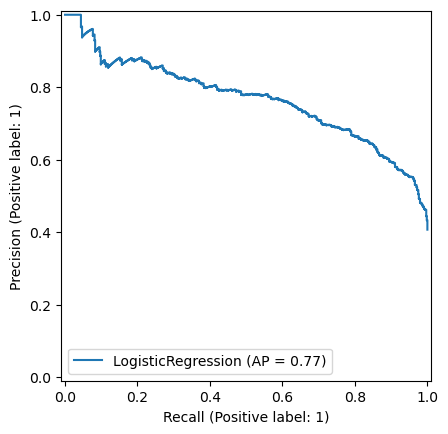

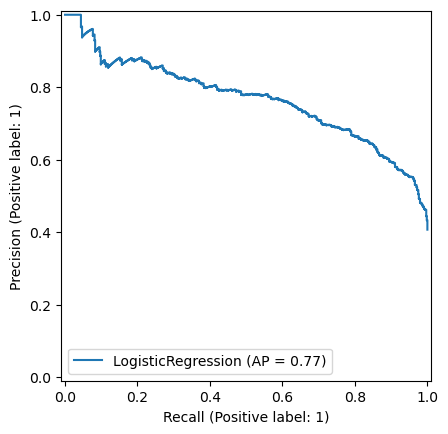

In [48]:
from sklearn.metrics import PrecisionRecallDisplay

# Get predicted probabilities for the positive class (class 1)
y_scores = log_model.predict_proba(X_test)[:, 1]

# Create a PrecisionRecallDisplay object and plot it
display = PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)
display.plot()



#### ROC curve

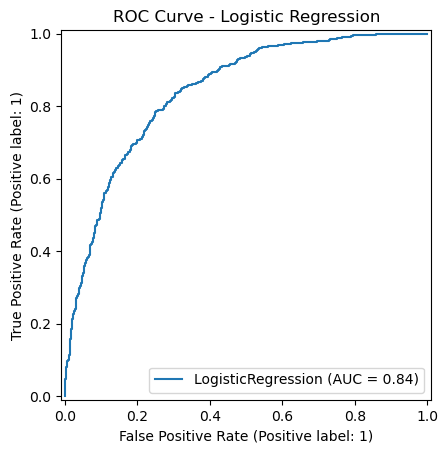

In [49]:
from sklearn.metrics import RocCurveDisplay

def plot_roc_curve(model, X_test, y_test, model_name):
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Create a ROCAUCDisplay object and plot it
    display = RocCurveDisplay.from_estimator(model, X_test, y_test)
    
    # Set the title to include the model name
    plt.title(f'ROC Curve - {model_name}')
    plt.show()

plot_roc_curve(log_model, X_test, y_test, 'Logistic Regression')



### Apply Boosting techniques

In [50]:
from sklearn.ensemble import AdaBoostClassifier

error_rates = []

for n in range(1,96):
    
    model_ada = AdaBoostClassifier(n_estimators=n)
    model_ada.fit(X_train_resampled, y_train_resampled)
    preds = model_ada.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

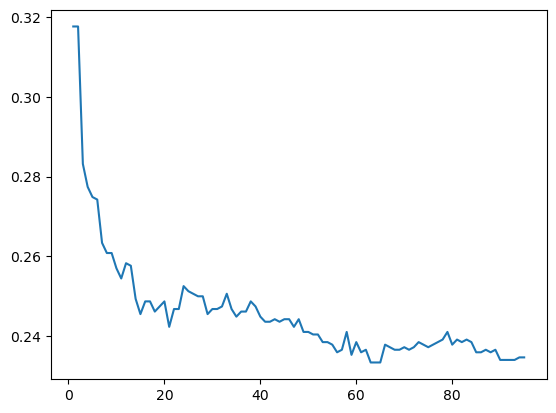

In [51]:
plt.plot(range(1,96),error_rates)

In [52]:
min(error_rates)

0.23341836734693877

In [53]:
error_rates.index(min(error_rates))

62

In [54]:
model_ada = AdaBoostClassifier(n_estimators=63)
model_ada.fit(X_train_resampled, y_train_resampled)

C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=63)

In [55]:
preds_ada = model_ada.predict(X_test)
accuracy_score(y_test,preds_ada)

0.7665816326530612

In [56]:
ada_results = classification_report(y_test, preds_ada)

In [57]:
model_ada.feature_importances_

array([0.06349206, 0.01587302, 0.03174603, 0.03174603, 0.03174603,
       0.01587302, 0.03174603, 0.03174603, 0.07936508, 0.11111111,
       0.03174603, 0.15873016, 0.0952381 , 0.01587302, 0.01587302,
       0.        , 0.01587302, 0.01587302, 0.        , 0.        ,
       0.        , 0.        , 0.07936508, 0.06349206, 0.06349206,
       0.        ])

In [58]:
feats = pd.DataFrame(index=X.columns,data=model_ada.feature_importances_,columns=['Importance'])
imp_feats = feats[feats['Importance']>0]
imp_feats.sort_values("Importance")

,Importance
gender_birth,0.015873
num_of_support_areas,0.015873
health_and_medicine,0.015873
stem,0.015873
arts_and_humanities,0.015873
student_athlete,0.015873
exercise_hours_weekly,0.031746
seek_help_if_need,0.031746
know_where_help,0.031746
diagnosed_mental_illness,0.031746


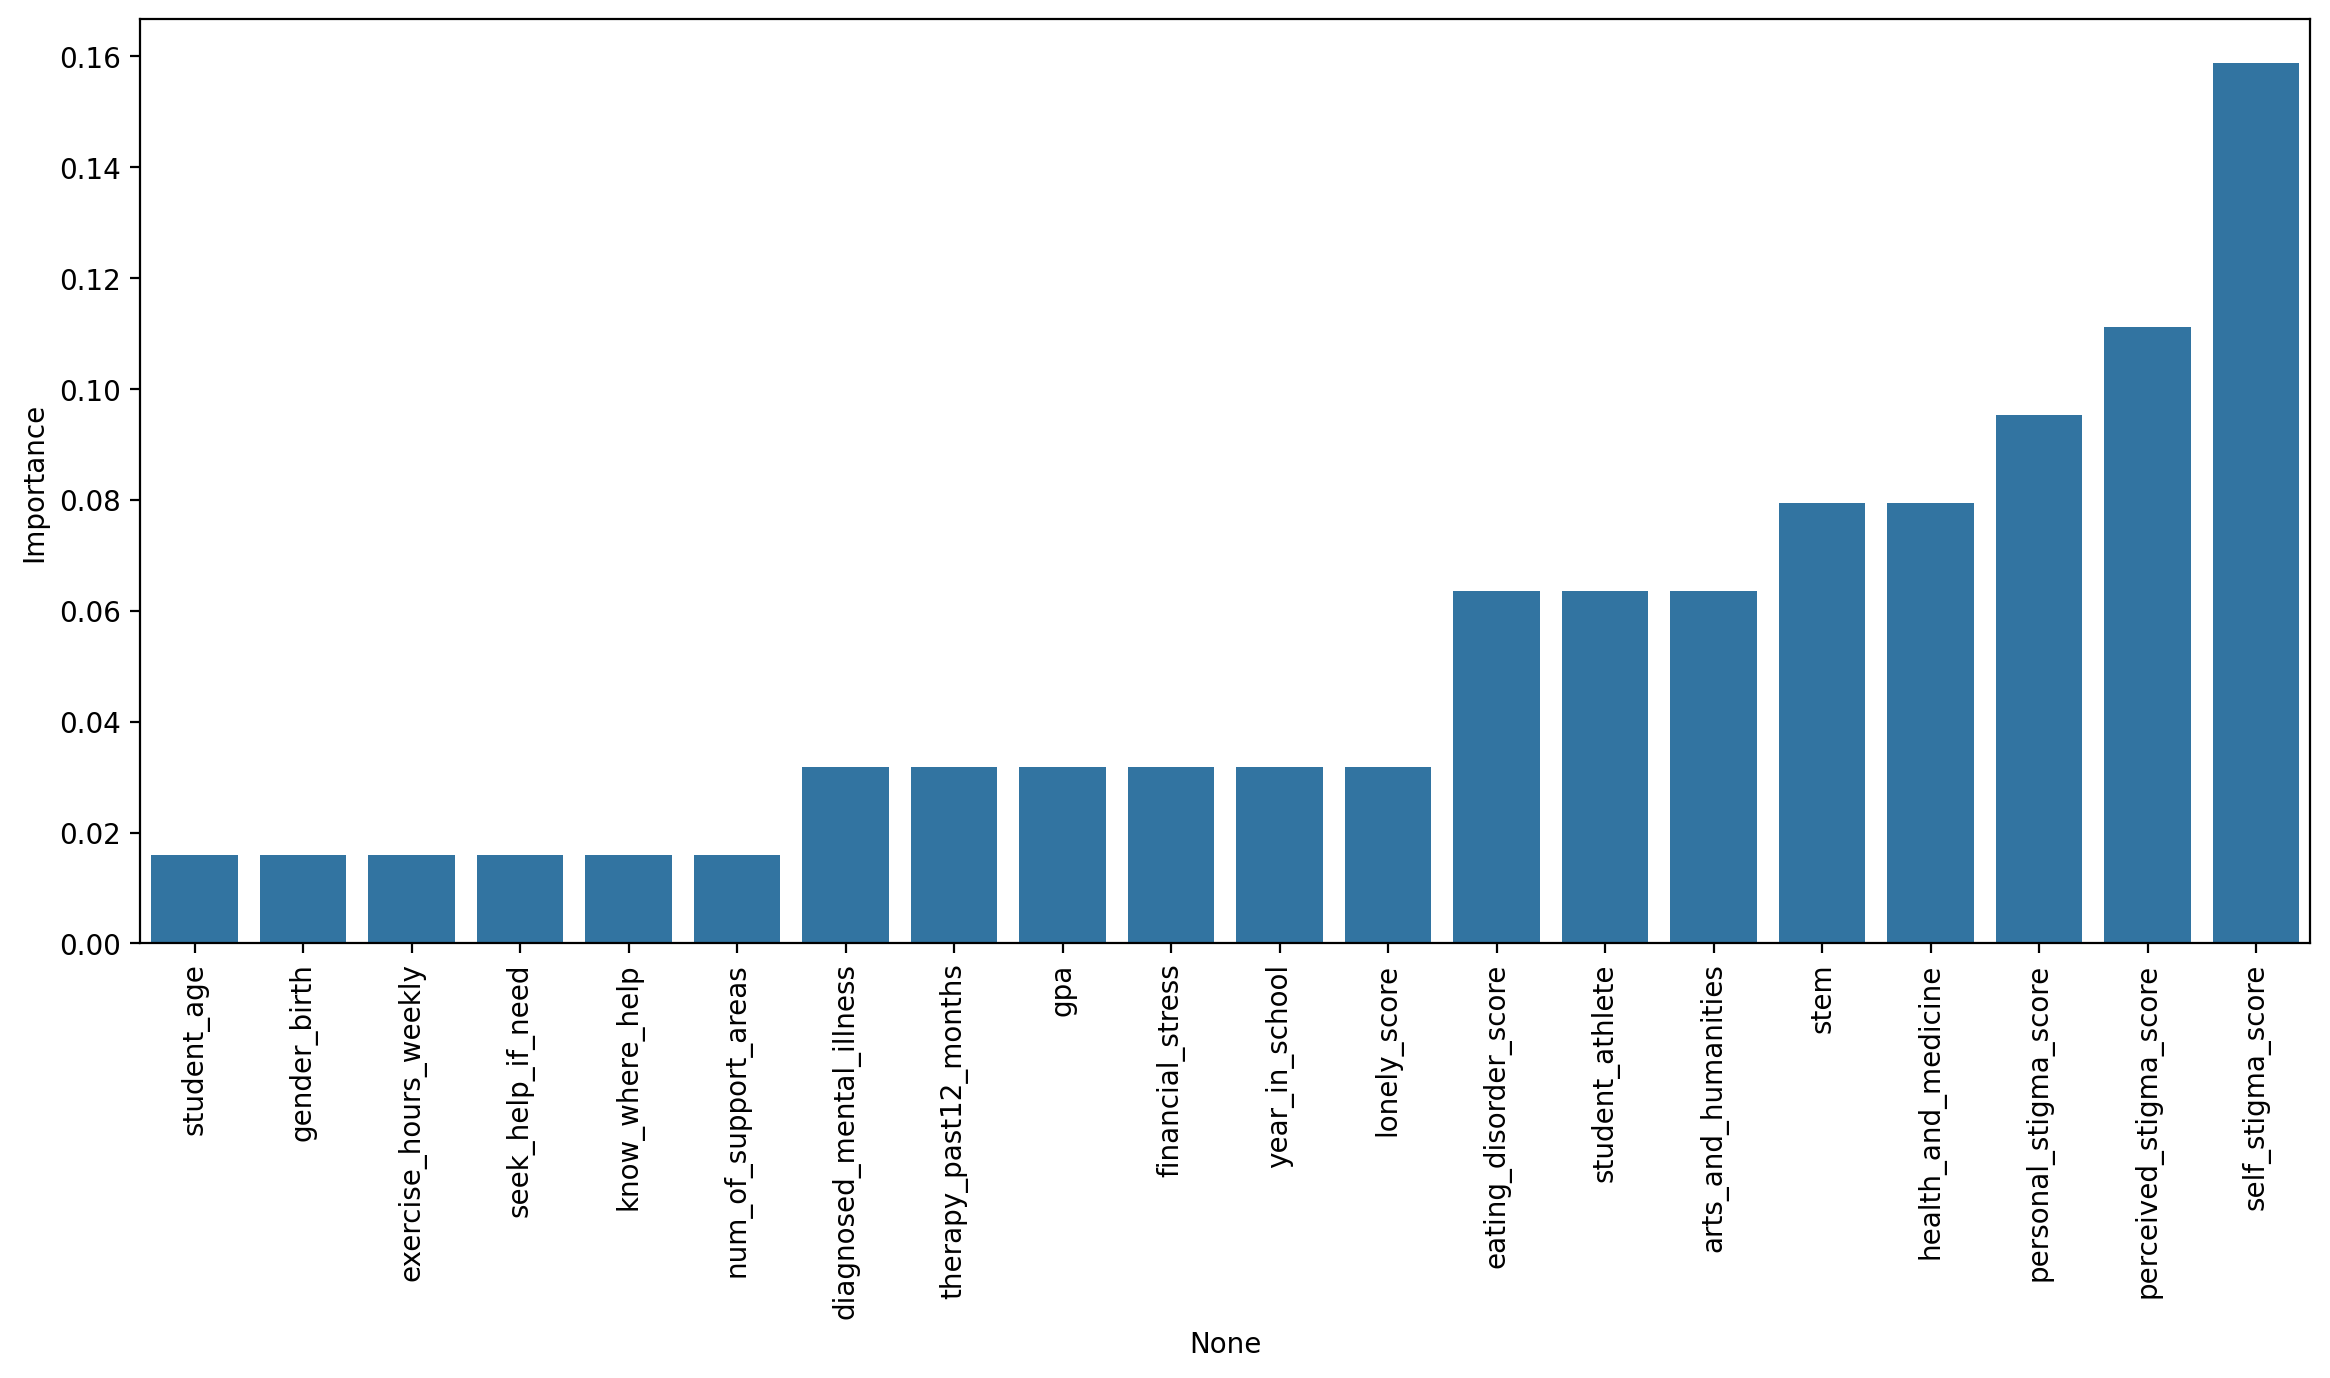

In [59]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')

plt.xticks(rotation=90);

### Testing With Gradient Boosting and Grid Search with CV

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

#### Fitting

In [61]:
grid.fit(X_train_resampled,y_train_resampled)
grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

#### Test model

In [62]:
pred_gradient = grid.predict(X_test)
gradient_results = classification_report(y_test,pred_gradient)
print(gradient_results)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       930
           1       0.69      0.73      0.71       638

    accuracy                           0.76      1568
   macro avg       0.75      0.75      0.75      1568
weighted avg       0.76      0.76      0.76      1568



In [63]:
grid.best_estimator_.feature_importances_
feat_import = grid.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

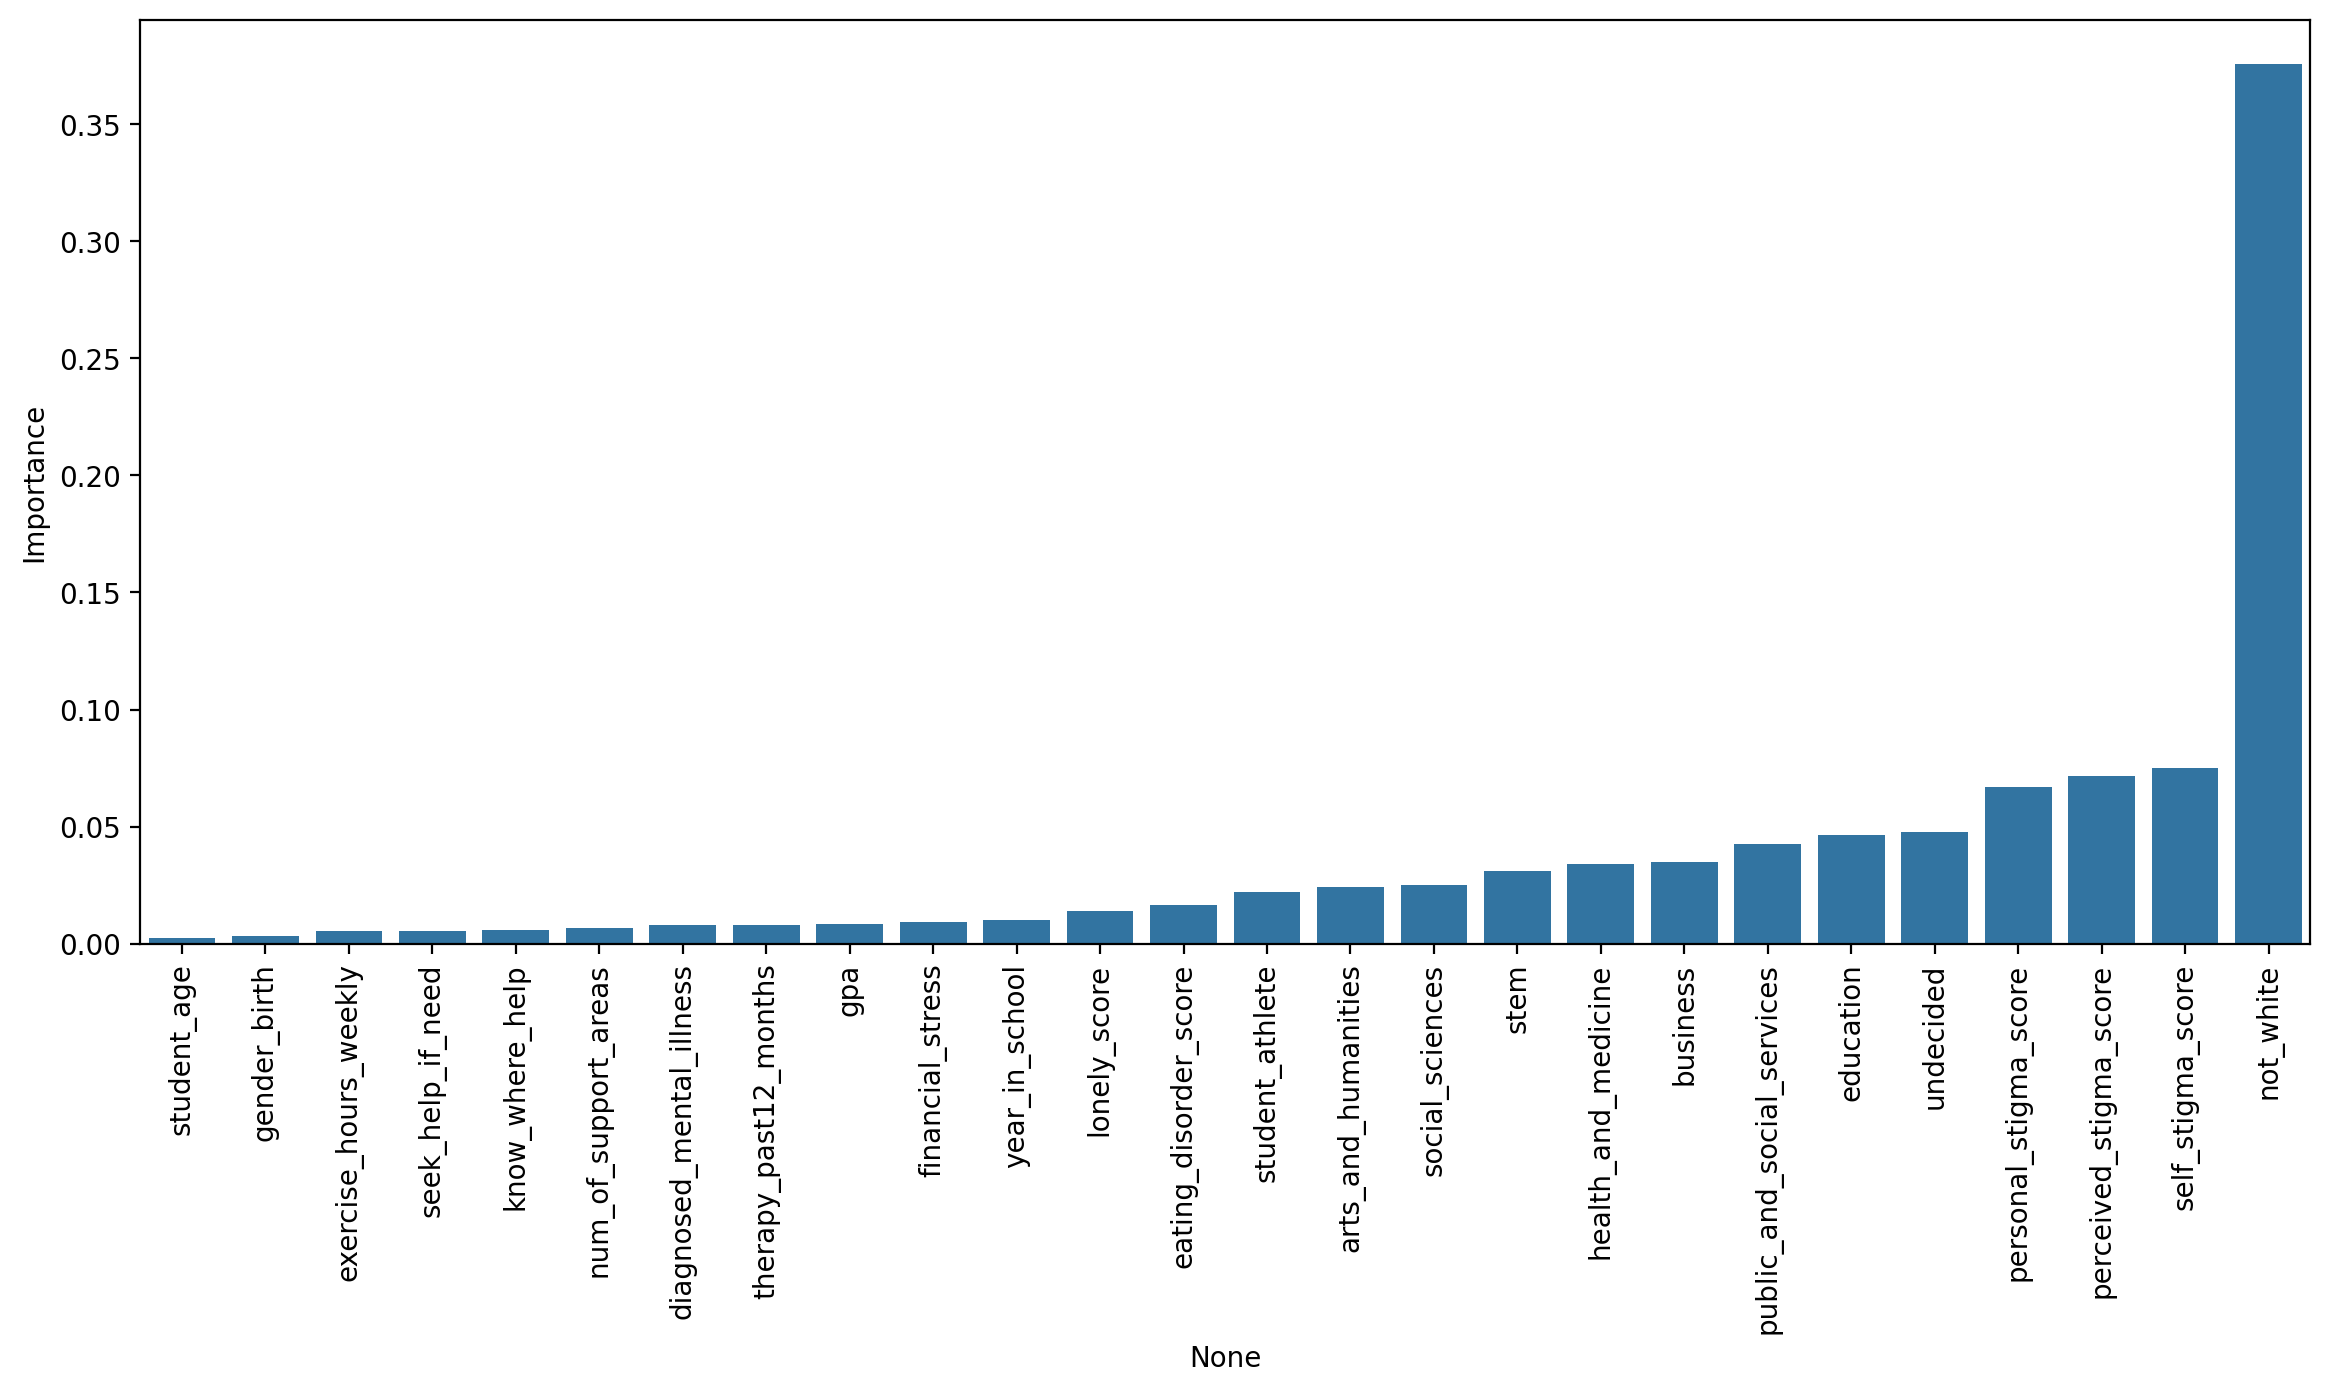

In [64]:
imp_feats.sort_values("Importance",ascending=False)
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

### XGBoosting Predictive modelling

In [65]:
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Set up GridSearchCV
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3)
grid_xgb.fit(X_train_resampled, y_train_resampled)

# Best parameters
grid_xgb.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

### Evaluate XGB model

In [66]:
xgb_pred = grid_xgb.predict(X_test)

In [67]:
xgb_results = classification_report(y_test,xgb_pred)
print(xgb_results)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       930
           1       0.68      0.71      0.70       638

    accuracy                           0.75      1568
   macro avg       0.74      0.74      0.74      1568
weighted avg       0.75      0.75      0.75      1568



## Compare Best Boosting Model

In [70]:
print('ADA Boosting Classification\n', ada_results)
print('Gradient Boosting Classification\n', gradient_results)
print('XGB Classification\n', xgb_results)

ADA Boosting Classification
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       930
           1       0.70      0.75      0.72       638

    accuracy                           0.77      1568
   macro avg       0.76      0.76      0.76      1568
weighted avg       0.77      0.77      0.77      1568

Gradient Boosting Classification
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       930
           1       0.69      0.73      0.71       638

    accuracy                           0.76      1568
   macro avg       0.75      0.75      0.75      1568
weighted avg       0.76      0.76      0.76      1568

XGB Classification
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       930
           1       0.68      0.71      0.70       638

    accuracy                           0.75      1568
   macro avg       0.74      0.74      0.74  

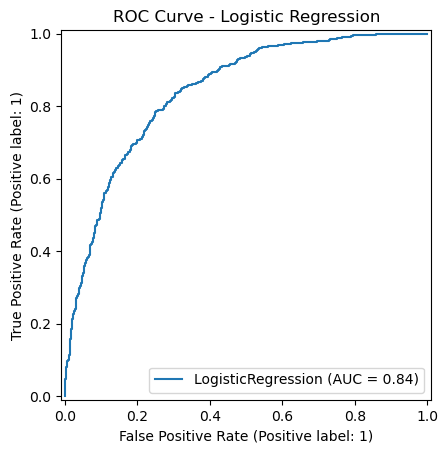

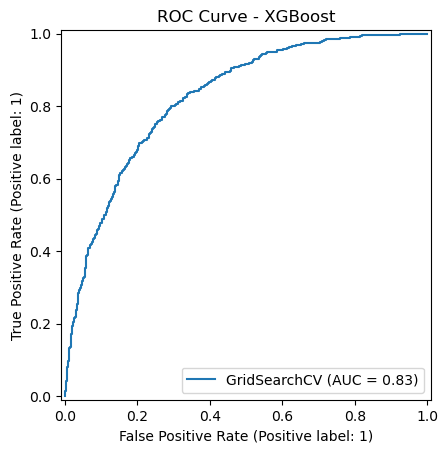

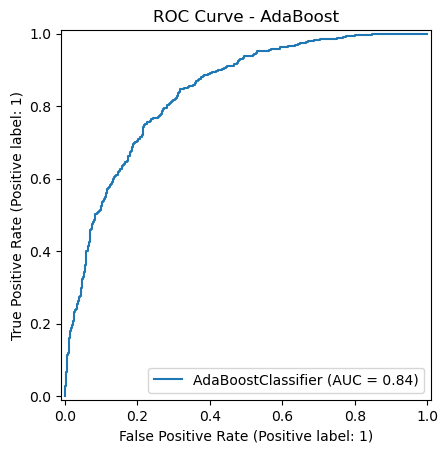

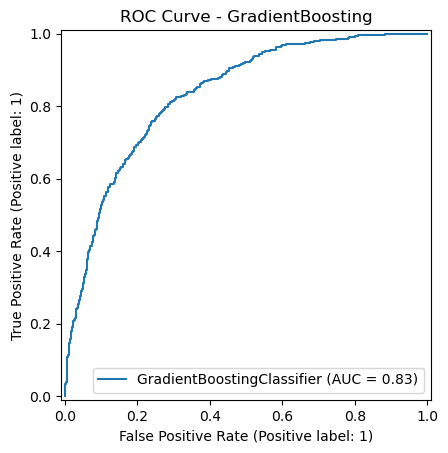

In [71]:
plot_roc_curve(log_model, X_test, y_test, 'Logistic Regression')
plot_roc_curve(grid_xgb, X_test, y_test, 'XGBoost')
plot_roc_curve(model_ada, X_test, y_test, 'AdaBoost')
plot_roc_curve(grid.best_estimator_, X_test, y_test, 'GradientBoosting')


ADA Boosting performed the best among the boosting models, achieving the highest accuracy overall. However, while its precision for Class 1 was slightly better than that of Logistic Regression, ADA Boosting had a slightly lower recall for Class 1, with Logistic Regression still performing better in that regard. Given that recall is often more important in identifying high-risk individuals (to avoid missing them), Logistic Regression might be the better option despite the higher precision of ADA Boosting